In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input,Flatten,Conv1D,MaxPooling1D
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import LSTM
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler


## With SMOTE (Synthetic Minority Oversampling Technique) with Evaluation

In [2]:
df= pd.read_csv('heart2020python.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,8,4,2,1,2,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,13,4,0,1,2,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,10,4,2,1,4,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,12,4,0,0,3,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,5,4,0,1,2,8,0,0,0


## splite data

In [3]:
df.drop(['DiffWalking',"SleepTime"],axis=1,inplace=True)
df.shape
df['HeartDisease'].value_counts()


HeartDisease
0    292422
1     27373
Name: count, dtype: int64

In [4]:
x = df.drop(["HeartDisease"] , axis = 1).values
y = df["HeartDisease"].values

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

In [6]:
sm = SMOTE(random_state = 42)
x_smote, y_smote= sm.fit_resample(x, y)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x_smote, y_smote, test_size=0.25, random_state=42)


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train2 = scaler.fit_transform(x_train2)
x_test2 = scaler.transform(x_test2)

## Random forest

In [8]:


# # Inicjalizacja modelu z domyślnymi parametrami
# rf = RandomForestClassifier()

# # Określenie siatki parametrów do przetestowania
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Liczba drzew
#     'max_depth': [10, 20, 30],        # Maksymalna głębokość drzewa
#     'min_samples_split': [2, 4, 6],   # Minimalna liczba próbek wymagana do podziału węzła
#     'min_samples_leaf': [1, 2, 4],    # Minimalna liczba próbek wymagana w liściu
#     'max_features': ['auto', 'sqrt']  # Liczba cech do rozważenia przy każdym podziale
# }

# # Utworzenie obiektu GridSearchCV
# cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# cv_rf.fit(x_train2, y_train2)

# # Najlepszy zestaw parametrów
# print("Najlepsze parametry: ", cv_rf.best_params_)

# # Najlepszy estimator
# best_rf = cv_rf.best_estimator_

# # Predykcje i ocena modelu
# ypred_train1 = best_rf.predict(x_train2)
# ypred_test1 = best_rf.predict(x_test2)

params = {
    'n_estimators': 300,  # Liczba drzew
    'max_depth': 30,        # Maksymalna głębokość drzewa
    'min_samples_split': 6,   # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': 1,    # Minimalna liczba próbek wymagana w liściu
    'max_features': 'sqrt'
}

rf_clf = RandomForestClassifier(
    n_estimators=params['n_estimators'],
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'],
    max_features=params['max_features'])
rf_clf.fit(x_train2, y_train2)

ypred_train1 = rf_clf.predict(x_train2)
ypred_test1 = rf_clf.predict(x_test2)

print("Training Results\n")
print(classification_report(y_train2, ypred_train1))
print("Test Results\n")
print(classification_report(y_test2, ypred_test1))

# Macierz pomyłek
conf_matrix = confusion_matrix(y_test2, ypred_test1)
print("Confusion Matrix:\n", conf_matrix)

# Ocena modelu za pomocą walidacji krzyżowej
cross_val_scores = cross_val_score(rf_clf, x_train2, y_train2, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score:", np.mean(cross_val_scores))

Training Results

              precision    recall  f1-score   support

           0       0.95      0.96      0.96    219310
           1       0.96      0.95      0.96    219323

    accuracy                           0.96    438633
   macro avg       0.96      0.96      0.96    438633
weighted avg       0.96      0.96      0.96    438633

Test Results

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     73112
           1       0.93      0.92      0.93     73099

    accuracy                           0.93    146211
   macro avg       0.93      0.93      0.93    146211
weighted avg       0.93      0.93      0.93    146211

Confusion Matrix:
 [[68414  4698]
 [ 6039 67060]]
Cross-validation scores: [0.92557593 0.92613449 0.92476661 0.92507352 0.92495953]
Average cross-validation score: 0.9253020165583171


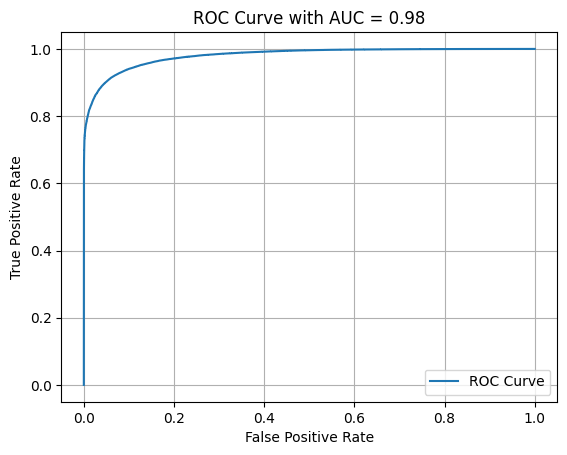

In [9]:

y_proba_test = rf_clf.predict_proba(x_test2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## DECISION TREE CLASSIFIER

In [10]:


# # Parametry do przetestowania w Grid Search
# param_grid = {
#     'max_depth': [3, 5, 10, None],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'criterion': ['gini', 'entropy']
# }

# # Utworzenie modelu drzewa decyzyjnego
# tree = DecisionTreeClassifier()

# # Uruchomienie Grid Search z walidacją krzyżową
# grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(x_train2, y_train2)

# # Wyświetlenie najlepszych parametrów i wyników
# print("Najlepsze parametry:", grid_search.best_params_)
# print("Najlepsza dokładność:", grid_search.best_score_)

# # Utworzenie i ocena modelu z najlepszymi parametrami
# best_tree = grid_search.best_estimator_
# best_tree.fit(x_train2, y_train2)

params = {
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 2,
    'criterion': 'entropy'
}
dc_clf = DecisionTreeClassifier(
    max_depth=params['max_depth'],
    min_samples_split=params['min_samples_split'],
    min_samples_leaf=params['min_samples_leaf'],
    criterion=params['criterion'])
dc_clf.fit(x_train2, y_train2)



ypred_train2 = dc_clf.predict(x_train2)
ypred_test2 = dc_clf.predict(x_test2)

# Ocena modelu na zbiorze testowym

print("Training Results\n")
print(classification_report(y_train2, ypred_train2))
print('Testing Results\n')
print(classification_report(y_test2, ypred_test2))

# Dodatkowo: Walidacja krzyżowa dla najlepszego modelu na całym zbiorze danych
cross_val_scores = cross_val_score(dc_clf, x_train2, y_train2, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

Training Results

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    219310
           1       0.99      0.95      0.97    219323

    accuracy                           0.97    438633
   macro avg       0.97      0.97      0.97    438633
weighted avg       0.97      0.97      0.97    438633

Testing Results

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     73112
           1       0.93      0.89      0.91     73099

    accuracy                           0.91    146211
   macro avg       0.91      0.91      0.91    146211
weighted avg       0.91      0.91      0.91    146211

Cross-Validation Scores for the Best Model: [0.90454478 0.90648261 0.90565048 0.90740487 0.90543282]
Average Cross-Validation Score: 0.9059031149764593


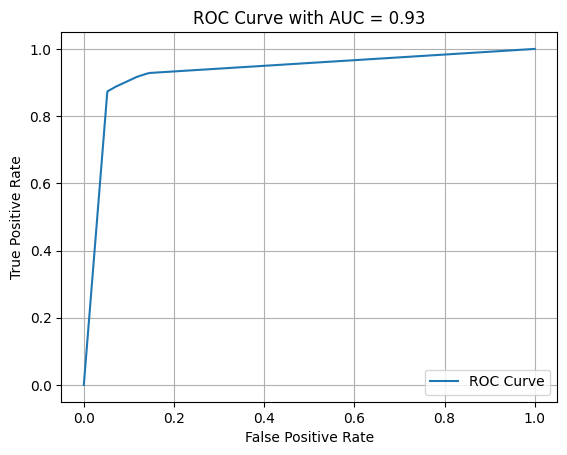

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba_test = dc_clf.predict_proba(x_test2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Naive Bayes

In [12]:
Gnb = GaussianNB()
Gnb.fit(x_train2, y_train2)
ypred_train3 = Gnb.predict(x_train2)
y_pred_test3 = Gnb.predict(x_test2)

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test2, y_pred_test3))

Naive Bayes Classifier Accuracy:  0.712579764860373


In [13]:
print("Training Results\n")
print(classification_report(y_train2, ypred_train3))

Training Results

              precision    recall  f1-score   support

           0       0.68      0.80      0.74    219310
           1       0.76      0.63      0.69    219323

    accuracy                           0.71    438633
   macro avg       0.72      0.71      0.71    438633
weighted avg       0.72      0.71      0.71    438633



In [14]:
print('Testing Results\n')
print(classification_report(y_test2, y_pred_test3))

Testing Results

              precision    recall  f1-score   support

           0       0.68      0.80      0.74     73112
           1       0.76      0.63      0.69     73099

    accuracy                           0.71    146211
   macro avg       0.72      0.71      0.71    146211
weighted avg       0.72      0.71      0.71    146211



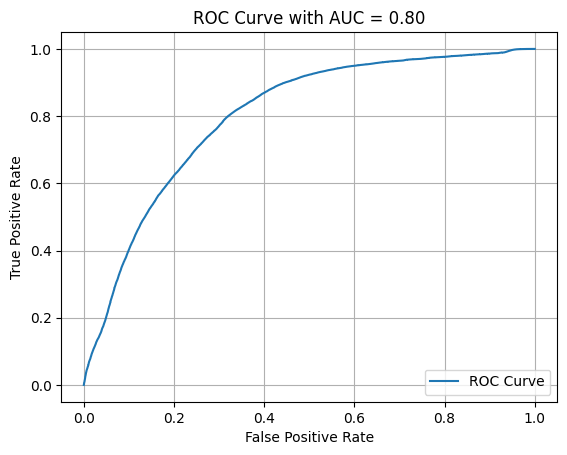

In [15]:
# cross_val_scores = cross_val_score(Gnb, x_train2, y_train2, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = Gnb.predict_proba(x_test2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## XGBOSST

Accuracy on Training set:  0.9199102666694025
Accuracy on Test set:  0.9129203685085253

Training Results

              precision    recall  f1-score   support

           0       0.90      0.95      0.92    219310
           1       0.94      0.89      0.92    219323

    accuracy                           0.92    438633
   macro avg       0.92      0.92      0.92    438633
weighted avg       0.92      0.92      0.92    438633

Testing Results

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     73112
           1       0.94      0.88      0.91     73099

    accuracy                           0.91    146211
   macro avg       0.91      0.91      0.91    146211
weighted avg       0.91      0.91      0.91    146211



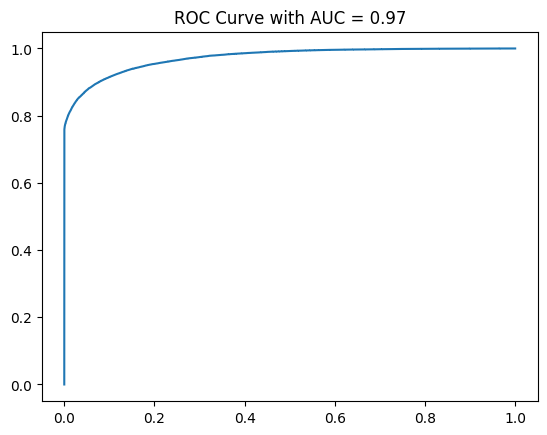

In [16]:


# # Inicjalizacja modelu XGBoost
# xg = XGBClassifier()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.7, 0.8, 0.9],
#     'colsample_bytree': [0.7, 0.8, 0.9]
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train2, y_train2)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_xg = grid_search.best_estimator_

params = {
    'n_estimators': 200,
    'max_depth': 7,
    'learning_rate': 0.2,
    'subsample': 0.9,
    'colsample_bytree': 0.9
}

xg_clf = XGBClassifier(
    n_estimators=params['n_estimators'],
    max_depth=params['max_depth'],
    learning_rate=params['learning_rate'],
    subsample=params['subsample'],
    colsample_bytree=params['colsample_bytree'])
xg_clf.fit(x_train2, y_train2)

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = xg_clf.predict(x_train2)
y_pred_test4 = xg_clf.predict(x_test2)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train2, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test2, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train2, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test2, y_pred_test4))

# cross_val_scores = cross_val_score(xg_clf, x_train2, y_train2, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
# Krzywa ROC
y_proba_test4 = xg_clf.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test2, y_proba_test4)))
plt.show()

## logistic regression

Accuracy on Training set:  0.768870559214651
Accuracy on Test set:  0.7682185334892724

Training Results

              precision    recall  f1-score   support

           0       0.78      0.75      0.76    219310
           1       0.76      0.79      0.77    219323

    accuracy                           0.77    438633
   macro avg       0.77      0.77      0.77    438633
weighted avg       0.77      0.77      0.77    438633

Testing Results

              precision    recall  f1-score   support

           0       0.78      0.75      0.76     73112
           1       0.76      0.79      0.77     73099

    accuracy                           0.77    146211
   macro avg       0.77      0.77      0.77    146211
weighted avg       0.77      0.77      0.77    146211



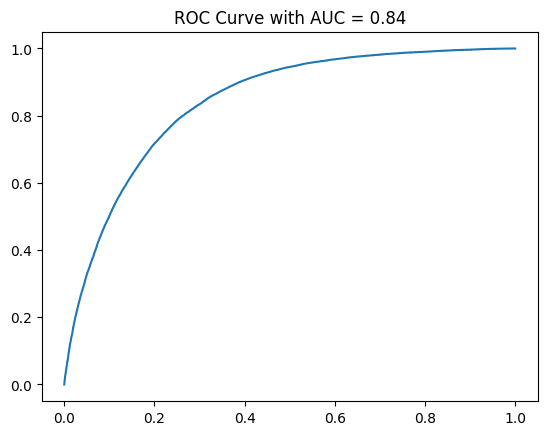

In [17]:


# # Inicjalizacja modelu regresji logistycznej
# lg = LogisticRegression()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'C': [0.01, 0.1, 1, 10, 100],  # Parametr regularyzacji
#     'penalty': ['l1', 'l2'],       # Typ regularyzacji
#     'solver': ['liblinear']        # Algorytm optymalizacji (liblinear jest dobrym wyborem dla małych zbiorów danych)
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train2, y_train2)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_lg = grid_search.best_estimator_

params = {
    'C': 10,
    'penalty': 'l1',
    'solver': 'liblinear'
}

best_lg = LogisticRegression(
    C=params['C'],
    penalty=params['penalty'],
    solver=params['solver'])
best_lg.fit(x_train2, y_train2)

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_lg.predict(x_train2)
y_pred_test4 = best_lg.predict(x_test2)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train2, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test2, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train2, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test2 ,y_pred_test4))

# cross_val_scores = cross_val_score(best_lg, x_train2, y_train2, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

# Krzywa ROC
y_proba_test4 = best_lg.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test2, y_proba_test4)))
plt.show()

## GradientBoostingClassifier

In [18]:
params = {
    'learning_rate': 0.2,
    'max_depth': 7,
    'min_samples_leaf': 1,
    'min_samples_split': 2,
    'n_estimators': 300
}

gb_clf = GradientBoostingClassifier(
    learning_rate=params['learning_rate'],
    max_depth=params['max_depth'],
    min_samples_leaf=params['min_samples_leaf'],
    min_samples_split=params['min_samples_split'],
    n_estimators=params['n_estimators'])
gb_clf.fit(x_train2, y_train2)

GradientBoostingClassifier(learning_rate=0.2, max_depth=7, n_estimators=300)

Accuracy on Training set:  0.9434219495569189
Accuracy on Test set:  0.9297111708421391

Training Results

              precision    recall  f1-score   support

           0       0.92      0.97      0.94    219310
           1       0.97      0.92      0.94    219323

    accuracy                           0.94    438633
   macro avg       0.94      0.94      0.94    438633
weighted avg       0.94      0.94      0.94    438633

Testing Results

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     73112
           1       0.96      0.90      0.93     73099

    accuracy                           0.93    146211
   macro avg       0.93      0.93      0.93    146211
weighted avg       0.93      0.93      0.93    146211



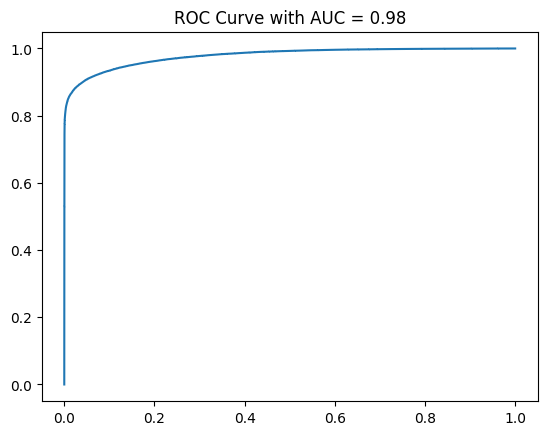

In [19]:


# Inicjalizacja modelu Gradient Boosting Classifier
# gb = GradientBoostingClassifier()

# # Definiowanie siatki hiperparametrów do przetestowania
# param_grid = {
#     'n_estimators': [100, 200, 300],  # Liczba drzew w ensemble
#     'learning_rate': [0.01, 0.1, 0.2], # Szybkość uczenia
#     'max_depth': [3, 5, 7],            # Maksymalna głębokość drzewa
#     'min_samples_split': [2, 4],       # Minimalna liczba próbek wymagana do podziału węzła
#     'min_samples_leaf': [1, 2]         # Minimalna liczba próbek w liściu
# }

# # Utworzenie obiektu GridSearchCV
# grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# # Przeszukiwanie siatki parametrów
# grid_search.fit(x_train2, y_train2)

# # Najlepsze parametry i najlepszy model
# print("Najlepsze parametry: ", grid_search.best_params_)
# best_gb = grid_search.best_estimator_


# Predykcje na zbiorze treningowym i testowym
ypred_train6 = gb_clf.predict(x_train2)
y_pred_test6 = gb_clf.predict(x_test2)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train2, ypred_train6))
print("Accuracy on Test set: ", accuracy_score(y_test2, y_pred_test6))
print("\nTraining Results\n")
print(classification_report(y_train2, ypred_train6))
print('Testing Results\n')
print(classification_report(y_test2, y_pred_test6))

# cross_val_scores = cross_val_score(gb_clf, x_train2, y_train2, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))


# Krzywa ROC
y_proba_test6 = gb_clf.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test6)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test2, y_proba_test6)))
plt.show()

## KNN

In [20]:
knn = KNeighborsClassifier()
knn.fit(x_train2, y_train2)


KNeighborsClassifier()

In [21]:
grid_cv = GridSearchCV(KNeighborsClassifier(), 
                       param_grid={
                           "n_neighbors": range(1, 50)
                       }, cv=5, scoring="f1", 
                       verbose=1, n_jobs=6)


In [22]:
grid_cv.fit(x_train2, 
            y_train2)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'n_neighbors': range(1, 50)}, scoring='f1', verbose=1)

In [23]:
grid_cv.best_score_


0.9061854221723665

In [24]:
knn = grid_cv.best_estimator_
knn

KNeighborsClassifier(n_neighbors=1)

In [25]:
ypred_train33 = grid_cv.predict(x_train2)
y_pred_test33 = grid_cv.predict(x_test2)
print("XGBClassifier Accuracy: ",accuracy_score(y_test2, y_pred_test33))

XGBClassifier Accuracy:  0.9146986204868307


In [26]:
print("Training Results\n")
print(classification_report(y_train2, ypred_train33))

Training Results

              precision    recall  f1-score   support

           0       0.99      0.99      0.99    219310
           1       0.99      0.99      0.99    219323

    accuracy                           0.99    438633
   macro avg       0.99      0.99      0.99    438633
weighted avg       0.99      0.99      0.99    438633



In [27]:
print("Training Results\n")
print(classification_report(y_test2, y_pred_test33))

Training Results

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     73112
           1       0.91      0.92      0.92     73099

    accuracy                           0.91    146211
   macro avg       0.91      0.91      0.91    146211
weighted avg       0.91      0.91      0.91    146211



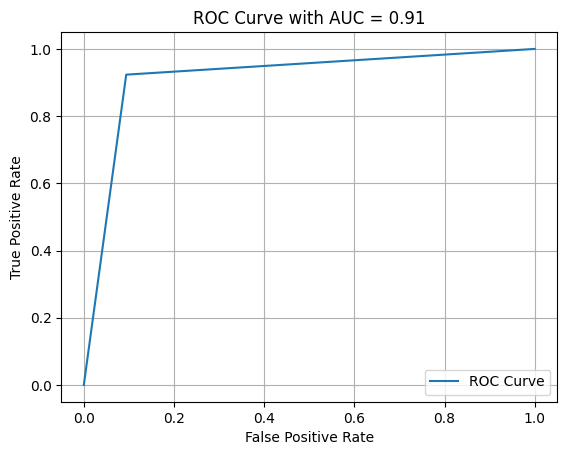

In [28]:

# cross_val_scores = cross_val_score(grid_cv, x_train2, y_train2, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

y_proba_test = grid_cv.predict_proba(x_test2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SIECI NEURONOWE

In [29]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

## inne próby sieci neuronowych 

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train2)
X_test_scaled = scaler.transform(x_test2)
tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(16,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_2.fit(x_train2,y_train2,epochs = 100)

Epoch 1/100



13708/13708 [==============================] - 24s 2ms/step - loss: 0.4367 - accuracy: 0.7951
Epoch 2/100
13708/13708 [==============================] - 22s 2ms/step - loss: 0.3643 - accuracy: 0.8277
Epoch 3/100
13708/13708 [==============================] - 22s 2ms/step - loss: 0.3477 - accuracy: 0.8338
Epoch 4/100
13708/13708 [==============================] - 22s 2ms/step - loss: 0.3413 - accuracy: 0.8365
Epoch 5/100
13708/13708 [==============================] - 22s 2ms/step - loss: 0.3365 - accuracy: 0.8383
Epoch 6/100
13708/13708 [==============================] - 23s 2ms/step - loss: 0.3318 - accuracy: 0.8414
Epoch 7/100
13708/13708 [==============================] - 22s 2ms/step - loss: 0.3291 - accuracy: 0.8427
Epoch 8/100
13708/13708 [==============================] - 23s 2ms/step - loss: 0.3275 - accuracy: 0.8435
Epoch 9/100
13708/13708 [==============================] - 22s 2ms/step - loss: 0.3257 - accuracy: 0.8445
Epoch 10/100
13708/13708 [==============================] 

In [31]:
model_2.evaluate(x_test2,y_test2)

4570/4570 [==============================] - 5s 1ms/step - loss: 0.2995 - accuracy: 0.8571


[0.29948607087135315, 0.857144832611084]

In [32]:
ypred_train7 = model_2.predict(x_train2)
y_pred_test7 = model_2.predict(x_test2)

y_pred_test7 = (y_pred_test7 > 0.5)
ypred_train7 = (ypred_train7 > 0.5)

print(classification_report(y_train2,ypred_train7))
print(classification_report(y_test2,y_pred_test7))

4570/4570 [==============================] - 4s 957us/step
              precision    recall  f1-score   support

           0       0.85      0.87      0.86    219310
           1       0.87      0.84      0.86    219323

    accuracy                           0.86    438633
   macro avg       0.86      0.86      0.86    438633
weighted avg       0.86      0.86      0.86    438633

              precision    recall  f1-score   support

           0       0.85      0.87      0.86     73112
           1       0.87      0.84      0.85     73099

    accuracy                           0.86    146211
   macro avg       0.86      0.86      0.86    146211
weighted avg       0.86      0.86      0.86    146211



4570/4570 [==============================] - 5s 1ms/step


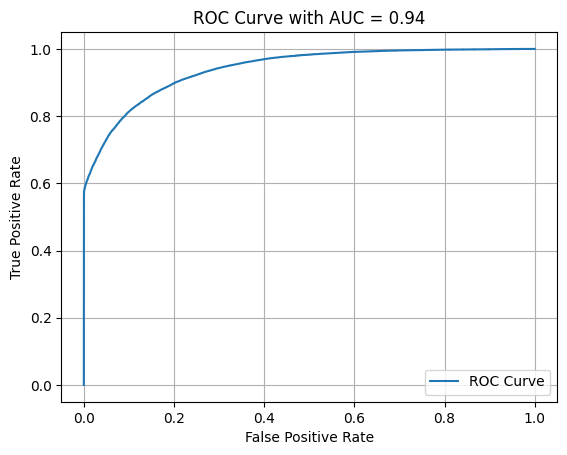

In [33]:
# cross_val_scores = cross_val_score(model_2, x_train2, y_train2, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

y_proba_test = model_2.predict(x_test2).flatten()

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [34]:

tf.random.set_seed(42)



model_21 = tf.keras.Sequential([
  tf.keras.layers.Dense(16,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_21.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_21.fit(x_train2,y_train2,epochs = 100)

Epoch 1/100
13708/13708 [==============================] - 18s 1ms/step - loss: 0.4307 - accuracy: 0.7967
Epoch 2/100
13708/13708 [==============================] - 17s 1ms/step - loss: 0.3609 - accuracy: 0.8277
Epoch 3/100
13708/13708 [==============================] - 17s 1ms/step - loss: 0.3467 - accuracy: 0.8340
Epoch 4/100
13708/13708 [==============================] - 17s 1ms/step - loss: 0.3413 - accuracy: 0.8357
Epoch 5/100
13708/13708 [==============================] - 17s 1ms/step - loss: 0.3379 - accuracy: 0.8372
Epoch 6/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.3355 - accuracy: 0.8385
Epoch 7/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.3338 - accuracy: 0.8393
Epoch 8/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.3319 - accuracy: 0.8400
Epoch 9/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.3296 - accuracy: 0.8411
Epoch 10/100
13708/13708 [====================

In [35]:
model_21.evaluate(x_test2,y_test2)

4570/4570 [==============================] - 4s 929us/step - loss: 0.3076 - accuracy: 0.8532


[0.3075971007347107, 0.8532463312149048]

In [36]:
ypred_train8 = model_21.predict(x_train2)
y_pred_test8 = model_21.predict(x_test2)

y_pred_test8 = (y_pred_test8 > 0.5)
ypred_train8 = (ypred_train8 > 0.5)

print(classification_report(y_train2,ypred_train8))
print(classification_report(y_test2,y_pred_test8))

4570/4570 [==============================] - 4s 852us/step
              precision    recall  f1-score   support

           0       0.83      0.90      0.86    219310
           1       0.89      0.81      0.85    219323

    accuracy                           0.85    438633
   macro avg       0.86      0.85      0.85    438633
weighted avg       0.86      0.85      0.85    438633

              precision    recall  f1-score   support

           0       0.82      0.90      0.86     73112
           1       0.89      0.81      0.85     73099

    accuracy                           0.85    146211
   macro avg       0.86      0.85      0.85    146211
weighted avg       0.86      0.85      0.85    146211



4570/4570 [==============================] - 5s 1ms/step


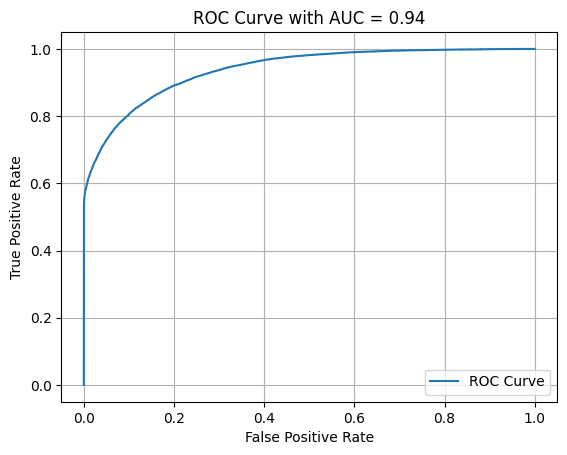

In [37]:
# cross_val_scores = cross_val_score(model_21, x_train2, y_train2, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

y_proba_test = model_21.predict(x_test2).flatten()

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inna proba 

In [38]:

tf.random.set_seed(42)

model_22 = tf.keras.Sequential([
  tf.keras.layers.Dense(16,activation = 'relu'),
  tf.keras.layers.Dense(32,activation = 'relu'),
  tf.keras.layers.Dense(16,activation = 'relu'),
  tf.keras.layers.Dense(9,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_22.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_22.fit(x_train2,y_train2,epochs = 100)

Epoch 1/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.4156 - accuracy: 0.8037
Epoch 2/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.3520 - accuracy: 0.8317
Epoch 3/100
13708/13708 [==============================] - 15s 1ms/step - loss: 0.3324 - accuracy: 0.8393
Epoch 4/100
13708/13708 [==============================] - 15s 1ms/step - loss: 0.3251 - accuracy: 0.8425
Epoch 5/100
13708/13708 [==============================] - 15s 1ms/step - loss: 0.3220 - accuracy: 0.8442
Epoch 6/100
13708/13708 [==============================] - 15s 1ms/step - loss: 0.3192 - accuracy: 0.8456
Epoch 7/100
13708/13708 [==============================] - 15s 1ms/step - loss: 0.3171 - accuracy: 0.8466
Epoch 8/100
13708/13708 [==============================] - 15s 1ms/step - loss: 0.3163 - accuracy: 0.8468
Epoch 9/100
13708/13708 [==============================] - 15s 1ms/step - loss: 0.3143 - accuracy: 0.8480
Epoch 10/100
13708/13708 [====================

In [39]:
model_22.evaluate(x_test2,y_test2)

4570/4570 [==============================] - 4s 890us/step - loss: 0.2877 - accuracy: 0.8618


[0.28774282336235046, 0.8617545962333679]

In [40]:
ypred_train9 = model_22.predict(x_train2)
y_pred_test9 = model_22.predict(x_test2)

y_pred_test9 = (y_pred_test9 > 0.5)
ypred_train9 = (ypred_train9 > 0.5)

print(classification_report(y_train2,ypred_train9))
print(classification_report(y_test2,y_pred_test9))

4570/4570 [==============================] - 4s 828us/step
              precision    recall  f1-score   support

           0       0.86      0.87      0.86    219310
           1       0.87      0.85      0.86    219323

    accuracy                           0.86    438633
   macro avg       0.86      0.86      0.86    438633
weighted avg       0.86      0.86      0.86    438633

              precision    recall  f1-score   support

           0       0.86      0.87      0.86     73112
           1       0.87      0.85      0.86     73099

    accuracy                           0.86    146211
   macro avg       0.86      0.86      0.86    146211
weighted avg       0.86      0.86      0.86    146211



4570/4570 [==============================] - 4s 871us/step


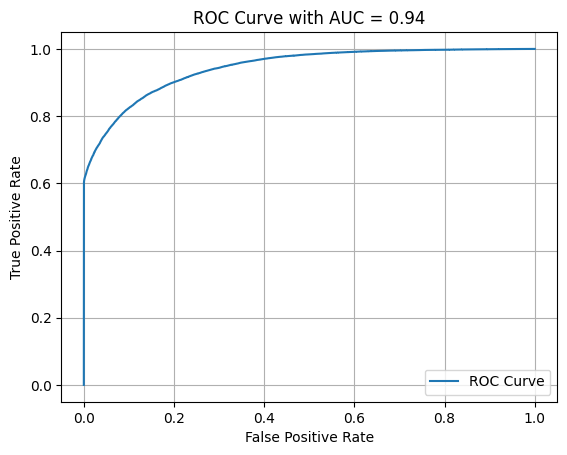

In [41]:
# cross_val_scores = cross_val_score(model_22, x_train2, y_train2, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

y_proba_test = model_22.predict(x_test2).flatten()

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inny model

In [42]:
model1 = Sequential()
model1.add(Dense(units=16,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=15,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam')

In [43]:
model1.fit(x=x_train2, 
          y=y_train2, 
          epochs=100,
          validation_data=(x_test2, y_test2), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
13708/13708 [==============================] - 19s 1ms/step - loss: 0.5293 - val_loss: 0.4743
Epoch 2/100
13708/13708 [==============================] - 18s 1ms/step - loss: 0.5049 - val_loss: 0.4635
Epoch 3/100
13708/13708 [==============================] - 19s 1ms/step - loss: 0.5013 - val_loss: 0.4607
Epoch 4/100
13708/13708 [==============================] - 19s 1ms/step - loss: 0.4999 - val_loss: 0.4642
Epoch 5/100
13708/13708 [==============================] - 19s 1ms/step - loss: 0.4980 - val_loss: 0.4613
Epoch 6/100
13708/13708 [==============================] - 19s 1ms/step - loss: 0.4974 - val_loss: 0.4618
Epoch 7/100
13708/13708 [==============================] - 19s 1ms/step - loss: 0.4971 - val_loss: 0.4624
Epoch 8/100
13708/13708 [==============================] - 18s 1ms/step - loss: 0.4969 - val_loss: 0.4647
Epoch 9/100
13708/13708 [==============================] - 18s 1ms/step - loss: 0.4963 - val_loss: 0.4601
Epoch 10/100
13708/13708 [====================

In [44]:
ypred_train10 = model1.predict(x_train2)
y_pred_test10 = model1.predict(x_test2)

y_pred_test10 = (y_pred_test10 > 0.5)
ypred_train10 = (ypred_train10 > 0.5)




4570/4570 [==============================] - 3s 750us/step


In [45]:
print('trening Results\n')
print(classification_report(y_train2,ypred_train10))

trening Results

              precision    recall  f1-score   support

           0       0.82      0.74      0.78    219310
           1       0.76      0.84      0.80    219323

    accuracy                           0.79    438633
   macro avg       0.79      0.79      0.79    438633
weighted avg       0.79      0.79      0.79    438633



In [46]:
print('Testing Results\n')
print(classification_report(y_test2,y_pred_test10))

Testing Results

              precision    recall  f1-score   support

           0       0.82      0.74      0.78     73112
           1       0.76      0.84      0.80     73099

    accuracy                           0.79    146211
   macro avg       0.79      0.79      0.79    146211
weighted avg       0.79      0.79      0.79    146211



4570/4570 [==============================] - 4s 778us/step


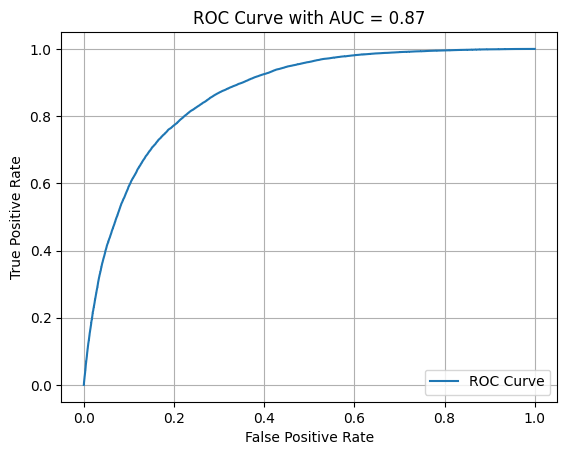

In [47]:
# cross_val_scores = cross_val_score(model1, x_train2, y_train2, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

y_proba_test = model1.predict(x_test2).flatten()

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inny model

In [48]:
model2 = Sequential()



model2.add(Dense(16,  activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(units=1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam')

In [49]:
model2.fit(x=x_train2, 
          y=y_train2, 
          epochs=100,
          validation_data=(x_test2, y_test2), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100
13708/13708 [==============================] - 17s 1ms/step - loss: 0.4878 - val_loss: 0.4387
Epoch 2/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.4547 - val_loss: 0.4188
Epoch 3/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.4471 - val_loss: 0.4126
Epoch 4/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.4441 - val_loss: 0.4114
Epoch 5/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.4405 - val_loss: 0.4081
Epoch 6/100
13708/13708 [==============================] - 17s 1ms/step - loss: 0.4393 - val_loss: 0.4117
Epoch 7/100
13708/13708 [==============================] - 17s 1ms/step - loss: 0.4381 - val_loss: 0.4056
Epoch 8/100
13708/13708 [==============================] - 17s 1ms/step - loss: 0.4374 - val_loss: 0.4062
Epoch 9/100
13708/13708 [==============================] - 16s 1ms/step - loss: 0.4370 - val_loss: 0.4025
Epoch 10/100
13708/13708 [====================

In [50]:
ypred_train11 = model2.predict(x_train2)
y_pred_test11 = model2.predict(x_test2)

y_pred_test11 = (y_pred_test11 > 0.5)
ypred_train11 = (ypred_train11 > 0.5)

print(classification_report(y_train2,ypred_train11))
print(classification_report(y_test2,y_pred_test11))

4570/4570 [==============================] - 4s 789us/step
              precision    recall  f1-score   support

           0       0.85      0.77      0.81    219310
           1       0.79      0.87      0.83    219323

    accuracy                           0.82    438633
   macro avg       0.82      0.82      0.82    438633
weighted avg       0.82      0.82      0.82    438633

              precision    recall  f1-score   support

           0       0.85      0.77      0.81     73112
           1       0.79      0.86      0.82     73099

    accuracy                           0.82    146211
   macro avg       0.82      0.82      0.82    146211
weighted avg       0.82      0.82      0.82    146211



4570/4570 [==============================] - 3s 760us/step


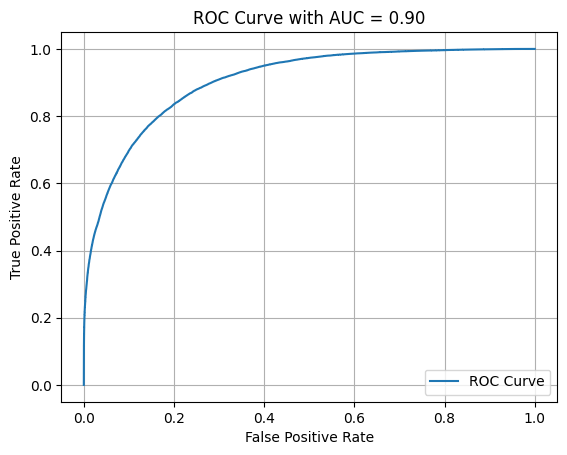

In [51]:
# cross_val_scores = cross_val_score(model2, x_train2, y_train2, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

y_proba_test = model2.predict(x_test2).flatten()

fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SVC

Training Results

              precision    recall  f1-score   support

           0       0.84      0.86      0.85    219310
           1       0.85      0.83      0.84    219323

    accuracy                           0.84    438633
   macro avg       0.85      0.84      0.84    438633
weighted avg       0.85      0.84      0.84    438633

Testing Results

              precision    recall  f1-score   support

           0       0.83      0.86      0.85     73112
           1       0.85      0.83      0.84     73099

    accuracy                           0.84    146211
   macro avg       0.84      0.84      0.84    146211
weighted avg       0.84      0.84      0.84    146211



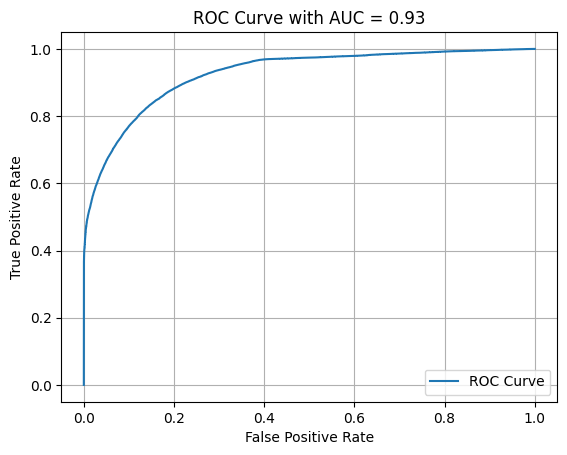

In [52]:
model3 = SVC(C=0.1, gamma=1, kernel='rbf', probability=True)
model3.fit(x_train2, y_train2)

ypred_train14 = model3.predict(x_train2)
y_pred_test14 = model3.predict(x_test2)

print("Training Results\n")
print(classification_report(y_train2, ypred_train14))
print("Testing Results\n")
print(classification_report(y_test2, y_pred_test14))

# cross_val_scores = cross_val_score(model3, x_train2, y_train2, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))


y_proba_test = model3.predict_proba(x_test2)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test2, y_proba_test)
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test2, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [53]:
# model3 = SVC(probability=True)

In [54]:
# model3.fit(x_train2,y_train2)

In [55]:
# ypred_train12 = model3.predict(x_train2)
# y_pred_test12 = model3.predict(x_test2)


# print(classification_report(y_train2,ypred_train12))
# print(classification_report(y_test2,y_pred_test12))

In [56]:
# param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [57]:
# grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [58]:
# grid.fit(x_train2,y_train2)

In [59]:
# grid.best_params_

In [60]:
# grid.best_estimator_

In [61]:
# ypred_train = grid.predict(x_train2)
# y_pred_test = grid.predict(x_test2)


# print(classification_report(y_train2,ypred_train))
# print(classification_report(y_test2,y_pred_test))